In [16]:
from os import listdir
from os.path import isfile, join
import json
import pandas as pd
import re
from PIL import Image,ImageOps

## Read Json files name

In [140]:
hate_data = [f for f in listdir('hateful_memes') if isfile(join('hateful_memes', f))]

In [141]:
hate_data

['dev_unseen.jsonl',
 'test_seen.jsonl',
 'dev_seen.jsonl',
 'train.jsonl',
 'README.md',
 'NLP_final_projetc_fb.ipynb',
 'LICENSE.txt',
 'test_unseen.jsonl']

### Select json file

In [142]:
josn_files_name = [i for i in hate_data if i.split('.')[1]=='jsonl']

In [143]:
josn_files_name_complete = ['hateful_memes/'+i for i in josn_files_name]
josn_files_name_complete

['hateful_memes/dev_unseen.jsonl',
 'hateful_memes/test_seen.jsonl',
 'hateful_memes/dev_seen.jsonl',
 'hateful_memes/train.jsonl',
 'hateful_memes/test_unseen.jsonl']

### read json file as dict

In [144]:
id_list = []
img_list = []
lable_list = []
text_list = []
wrong_line = []
for i in josn_files_name_complete:
    f = open(i).read()
    f_list = f.split('\n')
    for j in f_list:
        try:
            transfer_to_json = json.loads(str(j))
            id_list.append(transfer_to_json['id'])
            img_list.append('hateful_memes/'+transfer_to_json['img'])
            lable_list.append(transfer_to_json['label'])
            text_list.append(transfer_to_json['text'])
        except:
            wrong_line.append(j)

In [145]:
dataset = pd.DataFrame({'id':id_list, 'img':img_list, 'lable':lable_list, 'text':text_list})
dataset.head()

,id,img,lable,text
0,76432,hateful_memes/img/76432.png,0,you thinking what i'm thinking?
1,14270,hateful_memes/img/14270.png,0,a brilliant mind
2,56947,hateful_memes/img/56947.png,0,"pro gamer 6.000.000 kills, 1 death"
3,35174,hateful_memes/img/35174.png,0,lets end poaching
4,39264,hateful_memes/img/39264.png,0,my wife called me a good husband thats a huge ...


### Split into train and test

In [146]:
train = dataset.sample(frac=0.8, random_state=42)
test = dataset.drop(train.index)

In [147]:
train.head()

,id,img,lable,text
9526,61928,hateful_memes/img/61928.png,0,because of this guy i have multiple profile di...
2984,40217,hateful_memes/img/40217.png,0,2 years on the job... 4 million jobs gained 1 ...
6247,76582,hateful_memes/img/76582.png,0,how my friends introduce me she's our friend a...
9932,93245,hateful_memes/img/93245.png,0,when you tease your husband in public
7354,63418,hateful_memes/img/63418.png,0,damn! who am i gonna have to fuck to get this ...


In [148]:
test.head()

,id,img,lable,text
1,14270,hateful_memes/img/14270.png,0,a brilliant mind
4,39264,hateful_memes/img/39264.png,0,my wife called me a good husband thats a huge ...
5,18564,hateful_memes/img/18564.png,0,early america was cruel
9,51940,hateful_memes/img/51940.png,0,giving birth to a baby is one of the most memo...
11,30186,hateful_memes/img/30186.png,0,get you a man who will never lay a finger on y...


In [149]:
#img = Image.open('hateful_memes/img/30186.png')

In [150]:
# new_img = tf.keras.preprocessing.image.smart_resize(
#     img, (2000,2000), interpolation='bilinear'
# )
# new_img = tf.keras.utils.array_to_img(
#     new_img, data_format=None, scale=True, dtype=None
# )

### let image size become same

In [151]:
train_label = list(train.lable)
test_label = list(test.lable)
train_img = list(train.img)
test_img = list(test.img)

0=not-hateful, 1=hateful

In [6]:
import tensorflow as tf

In [21]:
def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i,j))
            if r != g != b: 
                return False
    return True

In [154]:
for i in range(len(train_img)):
    imag1 = Image.open(train_img[i])
    if is_grey_scale(train_img[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (200,200), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if train_label[i]==1:
        imag1.save("fb_train/hate/"+(train_img[i].split('/'))[-1], 'PNG')
    else:
        imag1.save("fb_train/nothate/"+(train_img[i].split('/'))[-1], 'PNG')

In [155]:
for i in range(len(test_img)):
    imag1 = Image.open(test_img[i])
    if is_grey_scale(test_img[i])==True:
        rgbimg = Image.new("RGBA", imag1.size)
        rgbimg.paste(imag1)
        imag1 = rgbimg
    imag1 = tf.keras.preprocessing.image.smart_resize(
        imag1, (200,200), interpolation='bilinear'
    )
    imag1 = tf.keras.utils.array_to_img(
        imag1, data_format=None, scale=True, dtype=None
    )
    if test_label[i]==1:
        imag1.save("fb_test/hate/"+(test_img[i].split('/'))[-1], 'PNG')
    else:
        imag1.save("fb_test/nothate/"+(test_img[i].split('/'))[-1], 'PNG')

# 1. Image Classification

## Build model

In [203]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [204]:
train_hate = [f for f in listdir('fb_train/hate/') if isfile(join('fb_train/hate/', f))]
train_nothate = [f for f in listdir('fb_train/nothate/') if isfile(join('fb_train/nothate/', f))]
test_hate = [f for f in listdir('fb_test/hate/') if isfile(join('fb_test/hate/', f))]
test_hate = [f for f in listdir('fb_test/hate/') if isfile(join('fb_test/hate/', f))]

In [205]:
train_dataset_name = []
train_dataset_label = []
for i in range(len(train_hate)):
    train_dataset_name.append('fb_train/hate/'+train_hate[i])
    train_dataset_label.append(1)
for i in range(len(train_nothate)):
    train_dataset_name.append('fb_train/nothate/'+train_nothate[i])
    train_dataset_label.append(0)

In [206]:
image_size = (100, 100)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "fb_train",
    image_size=image_size,
    batch_size=batch_size,
)

Found 9766 files belonging to 3 classes.


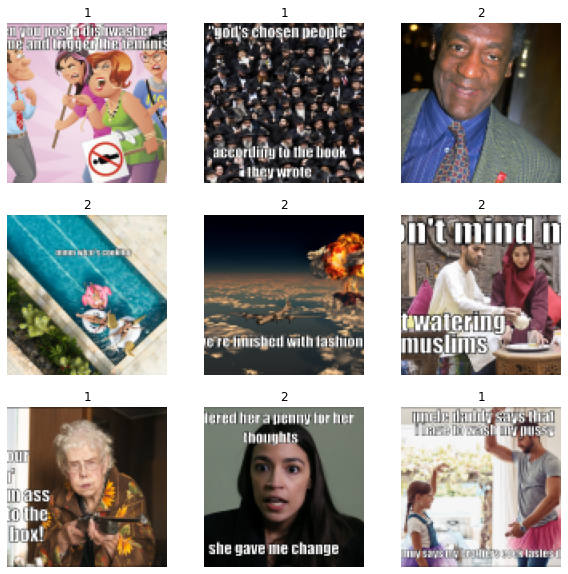

In [207]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [1]:
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [3]:
training_set = train_datagen.flow_from_directory('fb_train', target_size=(200, 200), batch_size=100, class_mode='binary')

Found 9766 images belonging to 3 classes.


In [4]:
test_set = train_datagen.flow_from_directory('fb_test', target_size=(200, 200), batch_size=100, class_mode='binary')

Found 2494 images belonging to 3 classes.


Have already try denseness, vgg16, resnet, EfficientNetB7, NASNetLarge,InceptionV3 

In [43]:
from keras.applications.densenet import DenseNet201,preprocess_input
from keras.layers import Activation, Dense
base_model = DenseNet201(include_top=False, weights='imagenet',
    input_shape=(200,200,3), pooling=max, classes=2)

x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x) 
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='softmax')(x)
model = tf.keras.Model(base_model.input, outputs=predictions)


In [8]:
for layer in model.layers:
    layer.trainable=True

In [9]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
model.fit_generator(training_set, steps_per_epoch=30, epochs=30, validation_data=test_set, validation_steps=100)

/var/folders/0f/brs6kj9d6bbftjh0sk1763yh0000gn/T/ipykernel_8203/3905381274.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(training_set, steps_per_epoch=30, epochs=30, validation_data=test_set, validation_steps=100)
2021-12-23 01:57:59.741947: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/30


2021-12-23 01:58:03.442974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - ETA: 0s - loss: -194.8974 - accuracy: 0.3767 

2021-12-23 02:03:47.734620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


30/30 [==============================] - 385s 13s/step - loss: -194.8974 - accuracy: 0.3767 - val_loss: -548.8444 - val_accuracy: 0.3825
Epoch 2/30
30/30 [==============================] - 332s 11s/step - loss: -1286.3079 - accuracy: 0.3710
Epoch 3/30
30/30 [==============================] - 335s 11s/step - loss: -4025.6489 - accuracy: 0.3683
Epoch 4/30
30/30 [==============================] - 335s 11s/step - loss: -9353.7119 - accuracy: 0.3641
Epoch 5/30
30/30 [==============================] - 349s 12s/step - loss: -17892.9688 - accuracy: 0.3757
Epoch 6/30
30/30 [==============================] - 348s 12s/step - loss: -31469.7324 - accuracy: 0.3683
Epoch 7/30
30/30 [==============================] - 348s 12s/step - loss: -51546.6758 - accuracy: 0.3580
Epoch 8/30
30/30 [==============================] - 349s 12s/step - loss: -76208.5391 - accuracy: 0.3697
Epoch 9/30
30/30 [==============================] - 335s 11s/step - loss: -111085.6172 - accuracy: 0.3583
Epoch 10/30
30/30 [======

In [26]:
score = model.evaluate(test_set, verbose=0)

In [28]:
print(f'Loss on test:{score[0]}, accuracy on test:{score[1]}')

Loss on test:-4223762.0, accuracy on test:0.38251805305480957


## Sava and load model

In [11]:
model.save('saved_model/nlp_final_image1')

2021-12-23 04:51:17.425846: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_model/nlp_final_image1/assets


In [12]:
new_model = tf.keras.models.load_model('saved_model/nlp_final_image1')

In [13]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 206, 206, 3)  0          ['input_2[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 100, 100, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                             

## Prediction

In [14]:
from keras.preprocessing import image
import numpy as np

## Prediction on our dataset

In [58]:
hate_image = [f for f in listdir('hate') if isfile(join('hate', f))]

In [59]:
nothate_image = [f for f in listdir('NotHate') if isfile(join('NotHate', f))]

In [67]:
image_name = []
image_expendarray = []
wrong_file = []
predict_label = []
for i in hate_image:
    try:
        imag1 = image.load_img('hate/'+i)
        if is_grey_scale('hate/'+i)==True:
            rgbimg = Image.new("RGBA", imag1.size)
            rgbimg.paste(imag1)
            imag1 = rgbimg
        imag1 = tf.keras.preprocessing.image.smart_resize(
            imag1, (200,200), interpolation='bilinear'
        )
        # imag1 = tf.keras.utils.array_to_img(
        #      imag1, data_format=None, scale=True, dtype=None
        # )
        imag1 = np.expand_dims(imag1[:,:,:3], axis=0)
        result = new_model.predict(imag1)
        image_name.append(i)
        predict_label.append(result[0][0])
    except:
        wrong_file.append('hate/'+i)
        print(f'Wrong on hate/{i}')
for i in nothate_image:
    try:
        imag1 = image.load_img('NotHate/'+i)
        if is_grey_scale('NotHate/'+i)==True:
            rgbimg = Image.new("RGBA", imag1.size)
            rgbimg.paste(imag1)
            imag1 = rgbimg
        imag1 = tf.keras.preprocessing.image.smart_resize(
            imag1, (200,200), interpolation='bilinear'
        )
        # imag1 = tf.keras.utils.array_to_img(
        #     imag1, data_format=None, scale=True, dtype=None
        # )
        imag1 = np.expand_dims(imag1[:,:,:3], axis=0)
        result = new_model.predict(np.array(imag1))
        image_name.append(i)
        predict_label.append(result[0][0])
    except:
        wrong_file.append('NotHate/'+i)
        print(f'Wrong on Notehate/{i}')

# 2. Text

In [31]:
train.to_csv('nlp_fb_train.csv')

In [32]:
test.to_csv('nlp_fb_test.csv')

In [4]:
!pip install -q -U tensorflow.tensorflow_text

ERROR: Could not find a version that satisfies the requirement tensorflow.tensorflow_text (from versions: none)
ERROR: No matching distribution found for tensorflow.tensorflow_text
